Sources:
- [List of cities in Colombia by population](https://en.wikipedia.org/wiki/List_of_cities_in_Colombia_by_population)
- [Departments of Colombia](https://en.wikipedia.org/wiki/Departments_of_Colombia)
- [Colombia Population](https://www.macrotrends.net/countries/COL/colombia/population)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('darkgrid', {'axes.facecolor': '#FFC300'})

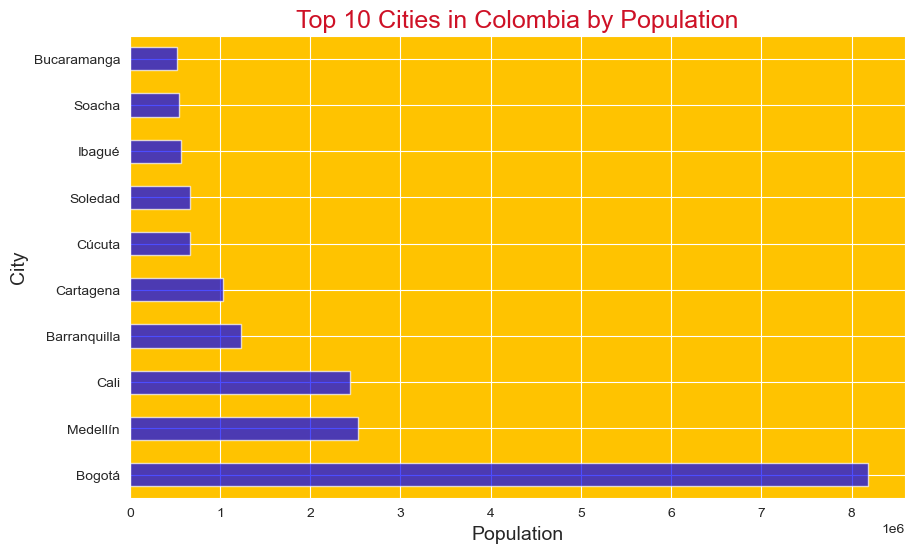

In [2]:
data = {
    'City': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Soledad', 'Ibagué', 'Soacha', 'Bucaramanga'],
    'Department': ['Capital District', 'Antioquia', 'Valle del Cauca', 'Atlántico', 'Bolívar', 'Norte de Santander', 'Atlántico', 'Tolima', 'Cundinamarca', 'Santander'],
    'Population': [8181047, 2529403, 2445405, 1232462, 1036134, 668838, 666247, 569336, 544997, 528610]
}

df = pd.DataFrame(data)

df.set_index('City', inplace=True)

df.sort_values('Population', ascending=False, inplace=True)

ax = df['Population'].plot(kind='barh', figsize=(10,6), color='blue', alpha=0.7)

ax.set_title('Top 10 Cities in Colombia by Population', fontsize=18, color='#CE1126')
ax.set_xlabel('Population', fontsize=14)
ax.set_ylabel('City', fontsize=14)
plt.savefig('updated_colombia_cities_population_top10.png')
plt.show()


https://en.wikipedia.org/wiki/List_of_cities_in_Colombia_by_population

https://en.wikipedia.org/wiki/Departments_of_Colombia

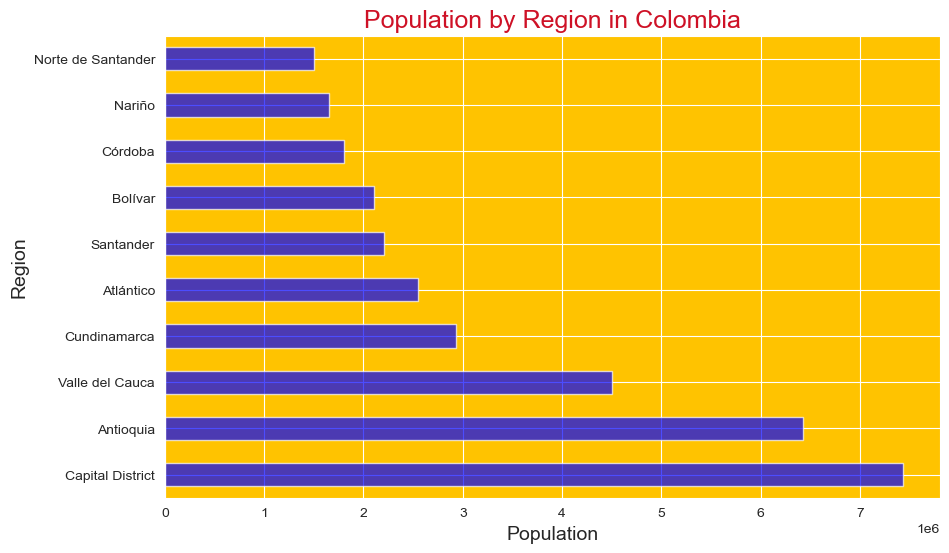

In [3]:

data = {
    'Region': ['Capital District', 'Antioquia', 'Valle del Cauca', 'Cundinamarca', 'Atlántico', 'Santander', 'Bolívar', 'Córdoba', 'Nariño', 'Norte de Santander'],
    'Population': [7430000, 6424000, 4503000, 2930000, 2546000, 2204000, 2105000, 1801000, 1654000, 1504000]
}

df = pd.DataFrame(data)

df.set_index('Region', inplace=True)

df.sort_values('Population', ascending=False, inplace=True)

ax = df['Population'].plot(kind='barh', figsize=(10,6), color='blue', alpha=0.7)

ax.set_title('Population by Region in Colombia', fontsize=18, color='#CE1126')
ax.set_xlabel('Population', fontsize=14)
ax.set_ylabel('Region', fontsize=14)

plt.savefig('updated_colombia_cities_population_byregion.png')
plt.show()


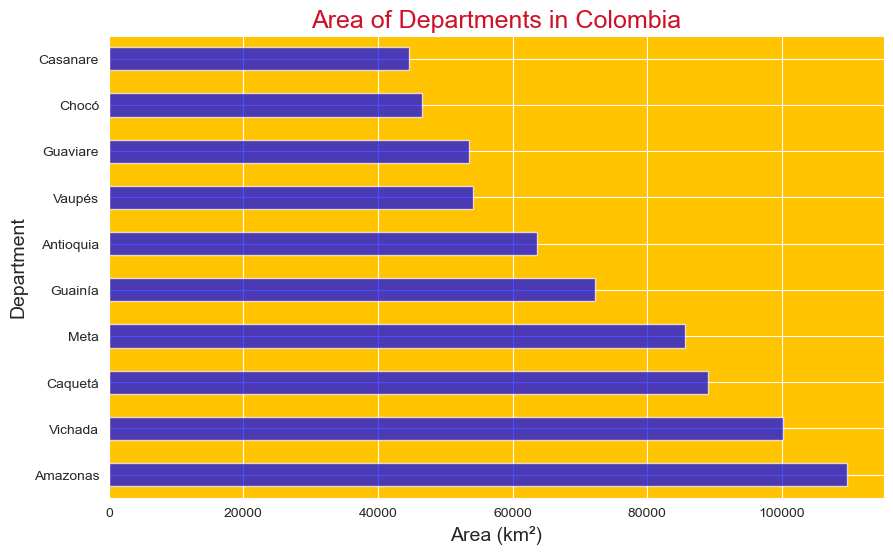

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Region': ['Amazonas', 'Vichada', 'Caquetá', 'Meta', 'Guainía', 'Antioquia', 'Vaupés', 'Guaviare', 'Chocó', 'Casanare'],
    'Area (km²)': [109665, 100242, 88965, 85635, 72238, 63612, 54135, 53460, 46530, 44640]
}

df = pd.DataFrame(data)

df.set_index('Region', inplace=True)

df.sort_values('Area (km²)', ascending=False, inplace=True)

ax = df['Area (km²)'].plot(kind='barh', figsize=(10,6), color='blue', alpha=0.7)

ax.set_title('Area of Departments in Colombia', fontsize=18, color='#CE1126')
ax.set_xlabel('Area (km²)', fontsize=14)
ax.set_ylabel('Department', fontsize=14)

plt.savefig('updated_colombia_department_area.png')
plt.show()


In [5]:
df = pd.read_csv('colombia_population.csv', skiprows=15)
df.columns = df.columns.str.strip()

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.year

In [7]:
df['Population (millions)'] = df['Population'] / 1000000
df.drop('Population', axis=1, inplace=True)

In [8]:
df.head()

,date,Annual % Change,Population (millions)
0,1950,NaN,11.769748
1,1951,2.70,12.087058
2,1952,2.75,12.419968
3,1953,2.80,12.767237
4,1954,2.85,13.130649


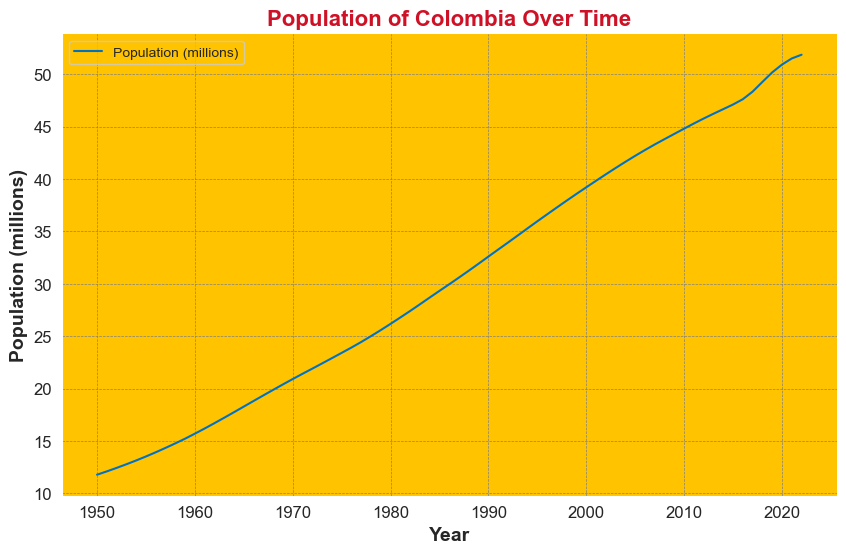

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

df.plot(x='date', y='Population (millions)', kind='line', color='#0072C6', ax=ax)

ax.set_title('Population of Colombia Over Time', fontweight='bold', fontsize=16, color='#CE1126')
ax.set_xlabel('Year', fontweight='bold', fontsize=14)
ax.set_ylabel('Population (millions)', fontweight='bold', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('updated_colombia_cities_population_time.png', bbox_inches='tight')
plt.show()


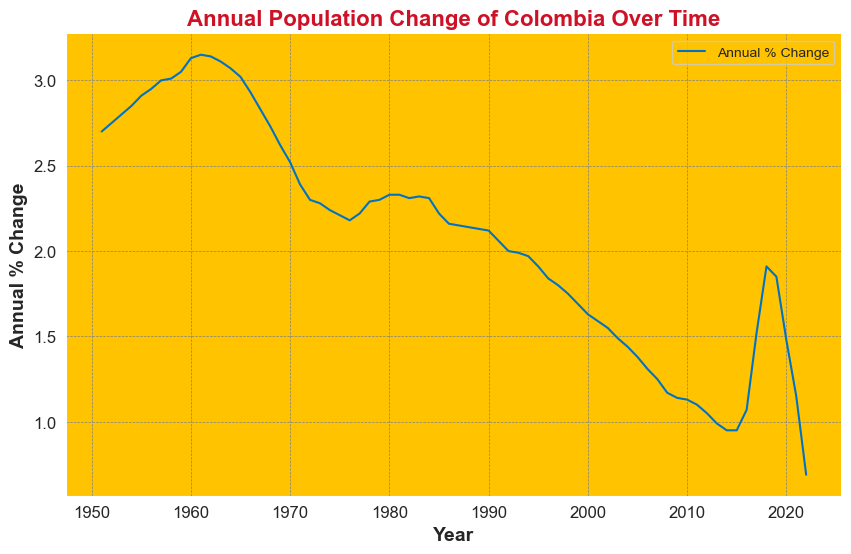

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = df.plot(x='date', y='Annual % Change', kind='line', color='#0072C6', ax=ax)

ax.set_title('Annual Population Change of Colombia Over Time', fontweight='bold', fontsize=16, color='#CE1126')
ax.set_xlabel('Year', fontweight='bold', fontsize=14)
ax.set_ylabel('Annual % Change', fontweight='bold', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('updated_colombia_cities_population_change.png', bbox_inches='tight')
plt.show()


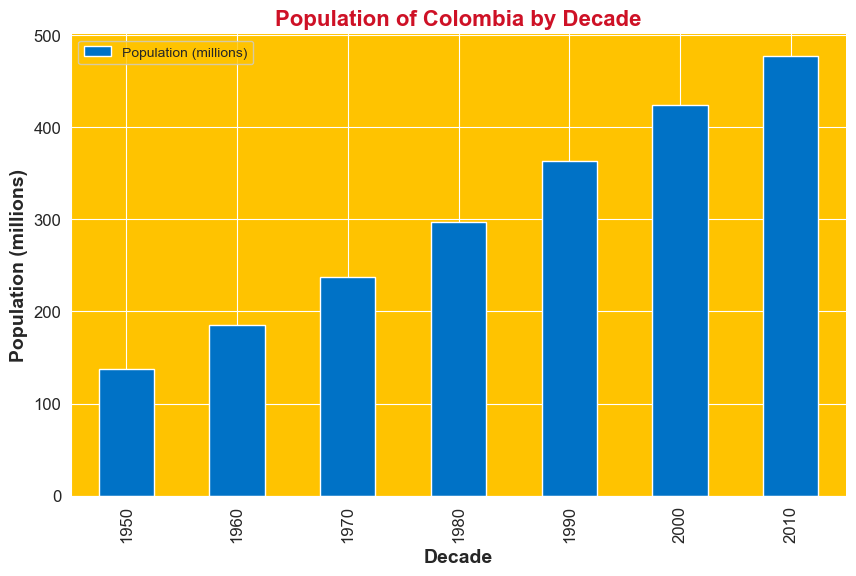

In [14]:
df['Decade'] = pd.cut(df['date'], bins=range(1950, 2030, 10), labels=range(1950, 2020, 10))
decade_df = df.groupby('Decade')['Population (millions)'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax = decade_df.plot(x='Decade', y='Population (millions)', kind='bar', stacked=True, color='#0072C6', ax=ax)

ax.set_title('Population of Colombia by Decade', fontweight='bold', fontsize=16, color='#CE1126')
ax.set_xlabel('Decade', fontweight='bold', fontsize=14)
ax.set_ylabel('Population (millions)', fontweight='bold', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=12)
plt.savefig('updated_colombia_cities_decade.png', bbox_inches='tight')
plt.show()
